### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_clean = application_df.drop(['EIN','NAME'], axis=1)  # axis=1 means drop the columns
df_clean.head()
df_original = df_clean.copy()

In [25]:
# Determine the number of unique values in each column.
df_clean.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [26]:
# Look at APPLICATION_TYPE value counts for binning
df_clean['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

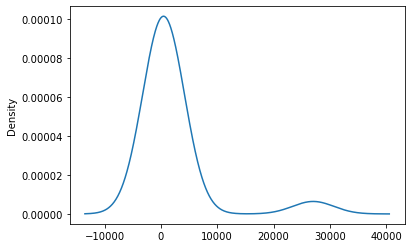

In [27]:
# Visualize the value counts of APPLICATION_TYPE
df_clean['APPLICATION_TYPE'].value_counts().plot.density()

In [28]:
# Determine which values to replace if counts are less than 10
replace_application_indicator = df_clean['APPLICATION_TYPE'].value_counts() < 1000
# switch the index with values 
replaced_application = pd.Series(replace_application_indicator.index.values, index=replace_application_indicator )
# select only values that are less than 10 (aka true values)
replaced_application = replaced_application[replaced_application.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application:
    df_clean.APPLICATION_TYPE = df_clean.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_clean.APPLICATION_TYPE.value_counts()
#print(application_df['APPLICATION_TYPE']!='Other')
#application_df.tail()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [29]:
# Look at CLASSIFICATION value counts for binning
df_clean['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [30]:
# Determine which values to replace if counts are less than 10
replace_class_indicator = df_clean['CLASSIFICATION'].value_counts() < 1000
# switch the index with values 
replace_class = pd.Series(replace_class_indicator.index.values, index=replace_class_indicator )
# select only values that are less than 10 (aka true values)
replace_class = replace_class[replace_class.index.values == True]

# Replace in dataframe
for cls in replace_class:
    df_clean.CLASSIFICATION = df_clean.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_clean.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [31]:
# Generate our categorical variable lists
application_cat = df_clean.select_dtypes(include=['object']).columns.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [32]:
df_clean[application_cat].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [33]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# Merge one-hot encoded features and drop the originals
df_application = df_clean.merge(encode_df, left_index=True, right_index=True)
df_application.drop(application_cat, 1, inplace=True)
df_application.head()

<ipython-input-34-024d8c5d6c36>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application.drop(application_cat, 1, inplace=True)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
# Split our preprocessed data into our features and target arrays
y = df_application["IS_SUCCESSFUL"].values
X = df_application.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=0.2)

In [36]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 1st attempt to optimize: optimize the Model - Target Accuracy better than 72%

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled[0])
no_of_nodes_layer1 = int(no_of_features * 0.50)
no_of_nodes_layer2 = int(no_of_features * 0.25)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))

# 2 hidden layer
nn.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu', input_dim=no_of_features))

# Output layer
nn.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn.summary()

40
20
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [39]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("hd5/AlphabetSoupCharity_Optimization_1.h5", verbose=1, save_weights_only=True, period=5)

In [40]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# Train the model
model = nn.fit(X_train_scaled, y_train, epochs=100,verbose=1,callbacks=[checkpoint])

Epoch 1/100
858/858 [==============================] - 1s 865us/step - loss: 0.5957 - accuracy: 0.7002
Epoch 2/100
858/858 [==============================] - 1s 880us/step - loss: 0.5641 - accuracy: 0.7263
Epoch 3/100
858/858 [==============================] - 1s 871us/step - loss: 0.5601 - accuracy: 0.7265
Epoch 4/100
858/858 [==============================] - 1s 841us/step - loss: 0.5581 - accuracy: 0.7272
Epoch 5/100
830/858 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.7285
Epoch 5: saving model to AlphabetSoupCharity_Optimization_1.h5
858/858 [==============================] - 1s 894us/step - loss: 0.5567 - accuracy: 0.7286
Epoch 6/100
858/858 [==============================] - 1s 903us/step - loss: 0.5558 - accuracy: 0.7284
Epoch 7/100
858/858 [==============================] - 1s 925us/step - loss: 0.5555 - accuracy: 0.7290
Epoch 8/100
858/858 [==============================] - 1s 928us/step - loss: 0.5547 - accuracy: 0.7284
Epoch 9/100
858/858 [=======

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 620us/step - loss: 0.5459 - accuracy: 0.7388
Loss: 0.5459438562393188, Accuracy: 0.7387754917144775


##### 2nd attempt ####

In [43]:
# Generate our categorical variable lists
df_orig_iter2 = df_original.copy()
application_cat_iter2 = df_orig_iter2.select_dtypes(include=['object']).columns.tolist()
application_cat_iter2

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [44]:
# Determine which values to replace if counts are less than 10
replace_application_indicator = df_orig_iter2['APPLICATION_TYPE'].value_counts() < 1000
# switch the index with values 
replaced_application = pd.Series(replace_application_indicator.index.values, index=replace_application_indicator )
# select only values that are less than 10 (aka true values)
replaced_application = replaced_application[replaced_application.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replaced_application:
    df_orig_iter2.APPLICATION_TYPE = df_orig_iter2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_orig_iter2.APPLICATION_TYPE.value_counts()
#print(application_df['APPLICATION_TYPE']!='Other')

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [45]:
# Determine which values to replace if counts are less than 10
replace_class_indicator = df_orig_iter2['CLASSIFICATION'].value_counts() < 1000
# switch the index with values 
replace_class = pd.Series(replace_class_indicator.index.values, index=replace_class_indicator )
# select only values that are less than 10 (aka true values)
replace_class = replace_class[replace_class.index.values == True]

# Replace in dataframe
for cls in replace_class:
    df_orig_iter2.CLASSIFICATION = df_orig_iter2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df_orig_iter2.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [46]:
application_cat_iter2.remove('INCOME_AMT')
df_orig_iter2.drop(['INCOME_AMT'], axis=1, inplace=True)

In [47]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter2[application_cat_iter2]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter2)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [48]:
df_orig_iter2[application_cat_iter2].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [49]:
# Merge one-hot encoded features and drop the originals
df_application_iter2 = df_orig_iter2.merge(encode_df, left_index=True, right_index=True)
df_application_iter2.drop(application_cat_iter2, 1, inplace=True)
#df_application_iter1.head()
application_cat

<ipython-input-49-dab63d8ddcde>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter2.drop(application_cat_iter2, 1, inplace=True)


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [50]:
df_application_iter2.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [51]:
# Split our preprocessed data into our features and target arrays
y2 = df_application_iter2["IS_SUCCESSFUL"].values
X2 = df_application_iter2.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, random_state=50, test_size=0.2)

In [52]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_2 = scaler.fit(X_train_2)

# Scale the data
X_train_scaled_2 = X_scaler_2.transform(X_train_2)
X_test_scaled_2 = X_scaler_2.transform(X_test_2)

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_2[0])
no_of_nodes_layer1 = int(no_of_features * 0.50)
no_of_nodes_layer2 = int(no_of_features * 0.20)
 
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu',input_dim=no_of_features))

# Output layer
nn2.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

31
15
6
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                480       
                                                                 
 dense_7 (Dense)             (None, 6)                 96        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 583
Trainable params: 583
Non-trainable params: 0
_________________________________________________________________


In [54]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("hd5/AlphabetSoupCharity_Optimization_2.h5", verbose=1, save_weights_only=True, period=5)

In [55]:
# Compile the model
nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# Train the model
model = nn2.fit(X_train_scaled_2, y_train_2, epochs=100,verbose=1,callbacks=[checkpoint])

Epoch 1/100
858/858 [==============================] - 1s 820us/step - loss: 0.5983 - accuracy: 0.7022
Epoch 2/100
858/858 [==============================] - 1s 819us/step - loss: 0.5731 - accuracy: 0.7207
Epoch 3/100
858/858 [==============================] - 1s 811us/step - loss: 0.5701 - accuracy: 0.7219
Epoch 4/100
858/858 [==============================] - 1s 822us/step - loss: 0.5680 - accuracy: 0.7219
Epoch 5/100
802/858 [===========================>..] - ETA: 0s - loss: 0.5667 - accuracy: 0.7217
Epoch 5: saving model to AlphabetSoupCharity_Optimization_2.h5
858/858 [==============================] - 1s 831us/step - loss: 0.5672 - accuracy: 0.7219
Epoch 6/100
858/858 [==============================] - 1s 839us/step - loss: 0.5664 - accuracy: 0.7221
Epoch 7/100
858/858 [==============================] - 1s 809us/step - loss: 0.5660 - accuracy: 0.7228
Epoch 8/100
858/858 [==============================] - 1s 816us/step - loss: 0.5654 - accuracy: 0.7234
Epoch 9/100
858/858 [=======

In [57]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled_2,y_test_2,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 638us/step - loss: 0.5473 - accuracy: 0.7376
Loss: 0.5473086833953857, Accuracy: 0.737609326839447


### last attempt to optimize: optimize the Model - Target Accuracy better than 74%

In [4]:
#copy the dataframe
df_orig_iter5 = df_clean.copy()

# Check to make sure binning was successful
df_orig_iter5.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Determine which values to replace if counts are less than 10
replace_CLASSIFICATION_indicator_5 = df_orig_iter5['CLASSIFICATION'].value_counts() < 1000
# switch the index with values 
replace_CLASSIFICATION_indicator_5 = pd.Series(replace_CLASSIFICATION_indicator_5.index.values, index=replace_CLASSIFICATION_indicator_5 )
# select only values that are less than 10 (aka true values)
replace_CLASSIFICATION_indicator_5 = replace_CLASSIFICATION_indicator_5[replace_CLASSIFICATION_indicator_5.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replace_CLASSIFICATION_indicator_5:
    df_orig_iter5.CLASSIFICATION = df_orig_iter5.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
df_orig_iter5.CLASSIFICATION.value_counts()
#print(application_df['APPLICATION_TYPE']!='Othe

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [6]:
df_orig_iter5.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Determine which values to replace if counts are less than 10
replace_application_indicator_5 = df_orig_iter5['APPLICATION_TYPE'].value_counts() < 1000
# switch the index with values 
replace_application_indicator_5 = pd.Series(replace_application_indicator_5.index.values, index=replace_application_indicator_5 )
# select only values that are less than 10 (aka true values)
replace_application_indicator_5 = replace_application_indicator_5[replace_application_indicator_5.index.values == True]
#print(replaced_application)
# Replace in dataframe
for app in replace_application_indicator_5:
    df_orig_iter5.APPLICATION_TYPE = df_orig_iter5.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df_orig_iter5.CLASSIFICATION.value_counts()
#print(application_df['APPLICATION_TYPE']!='Othe

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [8]:
df_orig_iter5.nunique()

APPLICATION_TYPE             6
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [9]:
# Generate our categorical variable lists
application_cat_iter5 = df_orig_iter5.select_dtypes(include=['object']).columns.tolist()
application_cat_iter5

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_orig_iter5[application_cat_iter5]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_iter5)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df_orig_iter5[application_cat_iter5].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [12]:
# Merge one-hot encoded features and drop the originals
df_application_iter5 = df_orig_iter5.merge(encode_df, left_index=True, right_index=True)
df_application_iter5.drop(application_cat_iter5, 1, inplace=True)
#df_application_iter1.head()
application_cat_iter5

<ipython-input-12-c1071648bef7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_application_iter5.drop(application_cat_iter5, 1, inplace=True)


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
df_application_iter5.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
 

In [14]:
# Split our preprocessed data into our features and target arrays
y5 = df_application_iter5["IS_SUCCESSFUL"].values
df_application_iter5.drop(["STATUS"], axis=1, inplace=True)
df_application_iter5.drop(["ASK_AMT"], axis=1, inplace=True)
X5 = df_application_iter5.drop(["IS_SUCCESSFUL"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X5, y5, random_state=50, test_size=0.2)

In [15]:
df_application_iter5.columns

Index(['IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T19',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSID

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler_5 = scaler.fit(X_train_5)

# Scale the data
X_train_scaled_5 = X_scaler_5.transform(X_train_5)
X_test_scaled_5 = X_scaler_5.transform(X_test_5)

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled_5[0])
no_of_nodes_layer1 = int(no_of_features * 1.5)
no_of_nodes_layer2 = int(no_of_features * 1)
no_of_output_nodes = 1

### print all the layers input
print(no_of_features)
print(no_of_nodes_layer1)
print(no_of_nodes_layer2)

nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=no_of_nodes_layer1, activation='relu', input_dim=no_of_features))


# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=no_of_nodes_layer2, activation='relu'))


# Output layer
nn5.add(tf.keras.layers.Dense(units=no_of_output_nodes, activation='sigmoid'))

# Check the structure of the model
nn5.summary()

38
57
38
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 57)                2223      
                                                                 
 dense_7 (Dense)             (None, 38)                2204      
                                                                 
 dense_8 (Dense)             (None, 1)                 39        
                                                                 
Total params: 4,466
Trainable params: 4,466
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("hd5/AlphabetSoupCharity_Optimization_3.h5", verbose=1, save_weights_only=True, period=5)

In [28]:
# Compile the model
nn5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Train the model
model = nn5.fit(X_train_scaled_5, y_train_5, epochs=100,verbose=1,validation_split=0.2, callbacks=[checkpoint])

Epoch 1/100
686/686 [==============================] - 1s 1ms/step - loss: 0.5795 - accuracy: 0.7139 - val_loss: 0.5597 - val_accuracy: 0.7305
Epoch 2/100
686/686 [==============================] - 1s 969us/step - loss: 0.5639 - accuracy: 0.7251 - val_loss: 0.5548 - val_accuracy: 0.7301
Epoch 3/100
686/686 [==============================] - 1s 1ms/step - loss: 0.5607 - accuracy: 0.7252 - val_loss: 0.5568 - val_accuracy: 0.7310
Epoch 4/100
686/686 [==============================] - 1s 999us/step - loss: 0.5592 - accuracy: 0.7260 - val_loss: 0.5531 - val_accuracy: 0.7276
Epoch 5/100
686/686 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7260 - val_loss: 0.5538 - val_accuracy: 0.7321
Epoch 6/100
686/686 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7273 - val_loss: 0.5510 - val_accuracy: 0.7343
Epoch 7/100
686/686 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7266 - val_loss: 0.5524 - val_accuracy: 0.

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn5.evaluate(X_test_scaled_5,y_test_5,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 [==============================] - 0s 612us/step - loss: 0.5812 - accuracy: 0.7391
Loss: 0.5811824798583984, Accuracy: 0.7390670776367188
